
Delta hedging is a risk management strategy used to reduce the directional risk associated with options. It involves adjusting the position in the underlying asset to offset changes in the option's value due to price movements. The hedge ratio, or delta, indicates how much the option price changes with the underlying asset's price. By maintaining a delta-neutral portfolio, traders aim to protect against adverse price movements. This strategy requires continuous adjustments as the delta changes with market conditions.

**Delta hedging**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Delta Hedging with Support Vector Machines/delta_hedging_dataset.csv')

In [36]:
# Data preprocessing
X = df[['Underlying Asset Price (S)', 'Strike Price (K)', 'Time to Expiration (T)', 'Risk-free Interest Rate (r)', 'Volatility (sigma)']]
y = df['Delta']

In [37]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Model training
svm_model = SVR(kernel='rbf')  # Example with RBF kernel, adjust parameters as needed
svm_model.fit(X_train, y_train)

SVR()

In [39]:
# Model evaluation
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3237947858817671


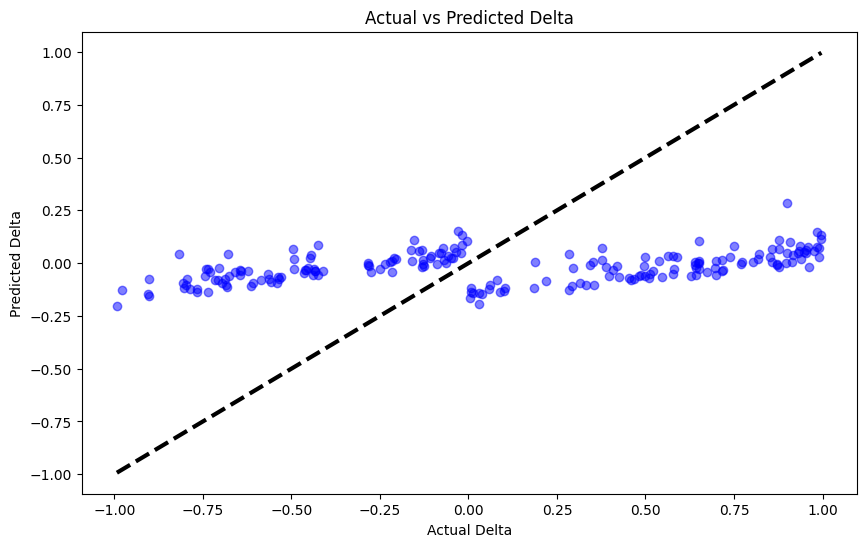

In [40]:
# Visualization of predicted vs actual delta
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Delta')
plt.ylabel('Predicted Delta')
plt.title('Actual vs Predicted Delta')
plt.show()

In [41]:
# Delta hedging strategy implementation
def delta_hedging_strategy(delta_predicted, num_option_contracts):
    hedge_ratio = delta_predicted * num_option_contracts
    return hedge_ratio

In [42]:
# Example usage: replace with actual prediction for new data
num_option_contracts = 10  # Number of option contracts

# Simulate real-time scenario: predict delta for new data
new_data = np.array([[110, 100, 0.5, 0.05, 0.2]])  # Example new data (adjust values as needed)
delta_predicted = svm_model.predict(new_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [43]:
# Calculate hedge ratio based on predicted delta
hedge_ratio = delta_hedging_strategy(delta_predicted, num_option_contracts)
print(f"Initial Hedge Ratio: {hedge_ratio}")

Initial Hedge Ratio: [0.44756822]


In [44]:
# Further steps: Implement dynamic adjustment of hedge ratio based on real-time delta predictions

# Simulate different market scenarios for performance evaluation
# Example: Varying underlying asset price (S) and volatility (sigma)
scenarios = [
    {'Underlying Asset Price (S)': 100, 'Volatility (sigma)': 0.2},
    {'Underlying Asset Price (S)': 110, 'Volatility (sigma)': 0.25},
    {'Underlying Asset Price (S)': 95, 'Volatility (sigma)': 0.3}
]


In [45]:
# Performance metrics
portfolio_values = []
initial_portfolio_value = 1000000  # Example initial portfolio value
transaction_cost = 0.01  # Example transaction cost per share

# Evaluate performance across different market scenarios
for scenario in scenarios:
    # Predict delta for the scenario
    scenario_data = np.array([[scenario['Underlying Asset Price (S)'], 100, 0.5, 0.05, scenario['Volatility (sigma)']]])
    delta_predicted_scenario = svm_model.predict(scenario_data)

    # Calculate hedge ratio based on predicted delta for the scenario
    hedge_ratio_scenario = delta_hedging_strategy(delta_predicted_scenario, num_option_contracts)

    # Simulate portfolio value change based on hedge ratio
    underlying_asset_price_change = scenario['Underlying Asset Price (S)'] - 100  # Change in underlying asset price
    portfolio_value_change = hedge_ratio_scenario * underlying_asset_price_change - transaction_cost * abs(hedge_ratio_scenario)
    portfolio_value = initial_portfolio_value + portfolio_value_change

    # Store the portfolio value for this scenario
    portfolio_values.append(portfolio_value)

    # Print or visualize results for each scenario
    print(f"\nScenario: Underlying Asset Price={scenario['Underlying Asset Price (S)']}, Volatility={scenario['Volatility (sigma)']}")
    print(f"Hedge Ratio: {hedge_ratio_scenario}")
    print(f"Portfolio Value: {portfolio_value}")



Scenario: Underlying Asset Price=100, Volatility=0.2
Hedge Ratio: [-0.31540048]
Portfolio Value: [999999.996846]

Scenario: Underlying Asset Price=110, Volatility=0.25
Hedge Ratio: [0.44752198]
Portfolio Value: [1000004.47074458]

Scenario: Underlying Asset Price=95, Volatility=0.3
Hedge Ratio: [-0.66864609]
Portfolio Value: [1000003.33654399]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


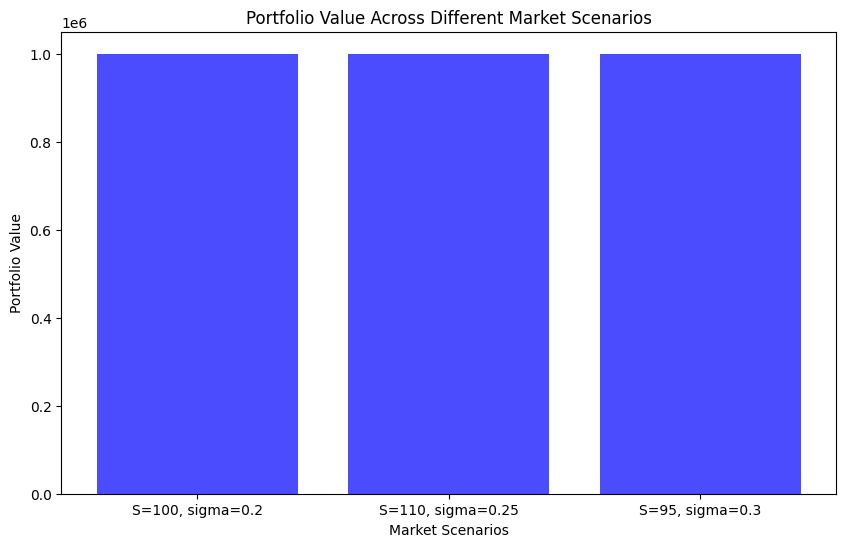

In [46]:
# Visualize portfolio values across scenarios
scenario_names = [f"S={s['Underlying Asset Price (S)']}, sigma={s['Volatility (sigma)']}" for s in scenarios]
plt.figure(figsize=(10, 6))
# Convert portfolio_values elements to scalar if they are NumPy arrays
portfolio_values_scalar = [v.item() if isinstance(v, np.ndarray) else v for v in portfolio_values]
plt.bar(scenario_names, portfolio_values_scalar, color='blue', alpha=0.7)
plt.xlabel('Market Scenarios')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Across Different Market Scenarios')
plt.show()

# Further steps:
# - Implement more complex scenario simulations.
# - Enhance performance evaluation with additional metrics.